# Limpio

In [5]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras 
from keras import layers
from keras.datasets import fashion_mnist
from sklearn.metrics import classification_report

In [6]:
import matplotlib.pyplot as plt

def plot(axis, train, validation, title):
    # We create a list of epoch numbers from 1 to the length of the training set
    epochs = range(1, len(train) + 1)
    # Graph of the training data with a solid blue line
    axis.plot(epochs, train, 'b-o', label='Training ' + title)
    # Graph of the validation data with a red dashed line
    axis.plot(epochs, validation, 'r--o', label='Validation '+ title)
    # We set the title of the graph, the X and Y axis labels
    axis.set_title('Training and validation ' + title)
    axis.set_xlabel('Epochs')
    axis.set_ylabel(title)
    # We show the legend of the graph
    axis.legend()    

def multiplot(history):
    fig, axes = plt.subplots(1, 2, figsize=(3, 3))
    fig.set_figwidth(11)
    plot(axes[0], history.history['loss'], history.history['val_loss'], 'loss')
    plot(axes[1], history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

    # We show the graphs on screen
    plt.show()

## Data preprocessing

In [7]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
'Train data'
# Reshape the images to vectors of size 784 (28*28)
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)

'Validation data separation'
val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]

print("Data ready. Training set size:", train_images.shape)

Data ready. Training set size: (50000, 784)


## Neural Network setup

In [15]:
def build_model(n_layers = 2, 
                n_per_layer = 50, 
                layer_act_func = 'sigmoid', 
                output_act_func = 'softmax',
                learning_rate = 0.001,
                loss_function = "categorical_crossentropy",
                metrics = ["accuracy"],
                epochs = 25,
                batch_size = 512):
    
    '''Builds and trains a feedforward neural network on the Fashion MNIST dataset.'''
    # Neural network setup
    _model = keras.Sequential(name='model')
    _model.add(layers.Input(shape=(28*28, )))
    for _lay in range(n_layers):
        _model.add(layers.Dense(n_per_layer, activation = layer_act_func)) 
    _model.add(layers.Dense(10, name = 'output', activation = output_act_func))
    _model.summary()
    # Training setup
    _opt = keras.optimizers.Adam(learning_rate = learning_rate)
    _model.compile(optimizer = _opt, loss = loss_function, metrics = metrics)
    _history = _model.fit(train_images,
                          train_labels,
                          epochs = epochs,
                          batch_size = batch_size,
                          validation_data = (val_images, val_labels))
    return _model, _history

## Reports and evaluation

In [16]:
def print_report(model):
    '''Generates and prints a classification report for the given model on the test dataset.'''
    # Predict the classes for the test set
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    # Generate the classification report
    report = classification_report(test_labels, predicted_classes, target_names = ['T-shirt/top', 
                                                                                    'Trouser', 
                                                                                    'Pullover', 
                                                                                    'Dress', 
                                                                                    'Coat', 
                                                                                    'Sandal', 
                                                                                    'Shirt', 
                                                                                    'Sneaker', 
                                                                                    'Bag', 
                                                                                    'Ankle boot'])
    # Print the evaluation metrics
    print ("Classification Report:")
    print (report)

## Testing different models

In [17]:
'Base model with relu activation'
relu_model, relu_history = build_model(
                                        n_layers = 2, 
                                        n_per_layer = 50, 
                                        layer_act_func = 'relu', 
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 30,
                                        batch_size = 512
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6874 - loss: 0.9300 - val_accuracy: 0.8002 - val_loss: 0.5750
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8258 - loss: 0.5053 - val_accuracy: 0.8337 - val_loss: 0.4769
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8468 - loss: 0.4430 - val_accuracy: 0.8492 - val_loss: 0.4337
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8549 - loss: 0.4155 - val_accuracy: 0.8572 - val_loss: 0.4044
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8623 - loss: 0.3892 - val_accuracy: 0.8633 - val_loss: 0.3872
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8697 - loss: 0.3725 - val_accuracy: 0.8697 - val_loss: 0.3748
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8717 - loss: 0.3626 - val_accuracy: 0.8673 - val_loss: 0.3753
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8768 - loss: 0.3457 - val_accuracy: 0.8695 - val_los

In [18]:
'Model with less epochs'
less_epochs_model, less_epochs_history = build_model(
                                        n_layers = 2,
                                        n_per_layer = 50,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 20,
                                        batch_size = 512
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7225 - loss: 0.8590 - val_accuracy: 0.8074 - val_loss: 0.5527
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8302 - loss: 0.4925 - val_accuracy: 0.8447 - val_loss: 0.4608
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8461 - loss: 0.4395 - val_accuracy: 0.8512 - val_loss: 0.4314
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8552 - loss: 0.4109 - val_accuracy: 0.8558 - val_loss: 0.4167
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8631 - loss: 0.3879 - val_accuracy: 0.8649 - val_loss: 0.3918
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8684 - loss: 0.3742 - val_accuracy: 0.8597 - val_loss: 0.3972
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8722 - loss: 0.3615 - val_accuracy: 0.8700 - val_loss: 0.3748
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8735 - loss: 0.3534 - val_accuracy: 0.8731 - val_loss:

In [20]:
'Model with more layers'
more_layers_model, more_layers_history = build_model(
                                        n_layers = 4,
                                        n_per_layer = 50,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 20,
                                        batch_size = 512
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,410 (185.20 KB)

 Trainable params: 47,410 (185.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6813 - loss: 0.9394 - val_accuracy: 0.8132 - val_loss: 0.5354
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8277 - loss: 0.4875 - val_accuracy: 0.8347 - val_loss: 0.4656
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8475 - loss: 0.4303 - val_accuracy: 0.8528 - val_loss: 0.4146
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8571 - loss: 0.4022 - val_accuracy: 0.8591 - val_loss: 0.3950
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8659 - loss: 0.3743 - val_accuracy: 0.8638 - val_loss: 0.3855
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8708 - loss: 0.3589 - val_accuracy: 0.8697 - val_loss: 0.3723
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8764 - loss: 0.3448 - val_accuracy: 0.8631 - val_loss: 0.3830
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8768 - loss: 0.3382 - val_accuracy: 0.8773 - val_los

In [31]:
'Model with 4 layers and 100 neurons per layer'
more_neurons_model, more_neurons_history = build_model(
                                        n_layers = 4,
                                        n_per_layer = 100,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 15,
                                        batch_size = 512
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,810 (428.95 KB)

 Trainable params: 109,810 (428.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7342 - loss: 0.7896 - val_accuracy: 0.8067 - val_loss: 0.5258
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8365 - loss: 0.4581 - val_accuracy: 0.8482 - val_loss: 0.4251
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8568 - loss: 0.4006 - val_accuracy: 0.8468 - val_loss: 0.4205
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8641 - loss: 0.3747 - val_accuracy: 0.8672 - val_loss: 0.3695
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8733 - loss: 0.3513 - val_accuracy: 0.8704 - val_loss: 0.3595
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8788 - loss: 0.3337 - val_accuracy: 0.8808 - val_loss: 0.3355
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8814 - loss: 0.3267 - val_accuracy: 0.8699 - val_loss: 0.3624
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8876 - loss: 0.3069 - val_accuracy: 0.8835 - val_loss

### Reports

In [32]:
'2 layers'
# print_report(relu_model)
# print_report(less_epochs_model)

'4 layers'
# print_report(more_layers_model)
print_report(more_neurons_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.81      0.74      0.77      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.75      0.86      0.80      1000
      Sandal       0.96      0.97      0.96      1000
       Shirt       0.68      0.69      0.69      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



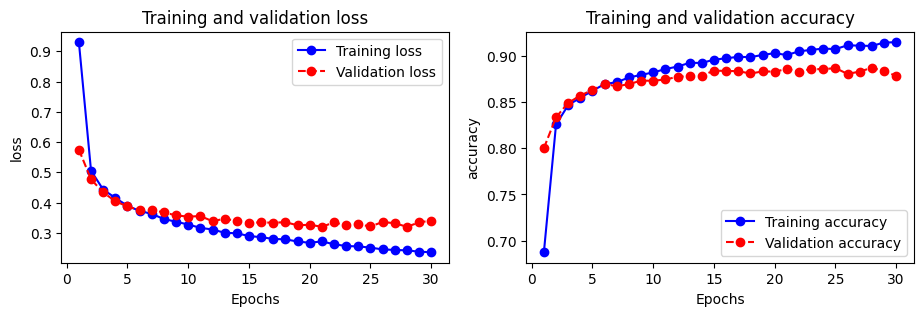

In [33]:
multiplot(relu_history)